In [1]:
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import glob, os

In [2]:
# !gsutil ls gs://hateful-memes/word_emb_experiments/

# SEABORN COLOR PALETTES
# palette = sns.color_palette("mako_r", num_models)
# [(0.71723995, 0.90086891, 0.77399039),
#  (0.5114027, 0.8463718, 0.69029789),
#  (0.31435139, 0.77822478, 0.67811118),
#  (0.23663857, 0.69651881, 0.67760151),
#  (0.20596097, 0.60894927, 0.66636568),
#  (0.20457804, 0.52139527, 0.64739979),
#  (0.21023306, 0.43794288, 0.62848279),
#  (0.23001121, 0.34597357, 0.60240251),
#  (0.25404842, 0.25650743, 0.51653282),
#  (0.23670785, 0.190297, 0.38504973),
#  (0.19093944, 0.1283047, 0.25077369),
#  (0.12151575, 0.07117741, 0.12698763)]
# palette = sns.color_palette("rocket", num_models)

# [(0.1125315, 0.06742194, 0.17414848),
# (0.22741085, 0.10140876, 0.25340813),
# (0.34940101, 0.11863987, 0.3138355),
# (0.47114798, 0.12098721, 0.34787978),
# (0.60444226, 0.10573912, 0.35820487),
# (0.73669146, 0.08704683, 0.33543669),
# (0.84335441, 0.14556683, 0.28480819),
# (0.91978131, 0.27526191, 0.24245973),
# (0.95001704, 0.42771398, 0.29244728),
# (0.96077819, 0.55997184, 0.39941173),
# (0.96479861, 0.68910113, 0.53756026),
# (0.9698028, 0.80981139, 0.70252255)]

In [3]:
def read_data(path):
    return pd.read_csv(path, index_col=None, header=0, delimiter=" ")

In [4]:
def generate_scatterplot(path, x, y, title):
    df = read_data(path)
    sns.scatterplot(data=df, x=x, y=y).set_title(title)

def generate_sparkline(path, x, y, title):
    df = read_data(path)
    sns.set_theme(style="dark")
    plt.xticks(rotation=45)
    sns.lineplot(data=df, x=x, y=y).set_title(title)
    
def generate_multiline(path, x, y_s, hue, title, legend):
    df, num_models = create_multifile_df(path)
    
    col = len(y_s)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, col, figsize=(16, 3))
    axes = [ax1, ax2, ax3, ax4]

    FASTTEXT      = (0.71723995, 0.90086891, 0.77399039)
    GLOVE         = (0.23663857, 0.69651881, 0.67760151)
    GLOVE_TWITTER = (0.84335441, 0.14556683, 0.28480819)
    CHARNGRAM     = (0.19093944, 0.1283047, 0.25077369)
    
    palette = [
        FASTTEXT,
        GLOVE,
        GLOVE,
        FASTTEXT,
        GLOVE_TWITTER,
        GLOVE,
        GLOVE_TWITTER,
        GLOVE,
        CHARNGRAM,
        GLOVE,
        GLOVE_TWITTER,
        GLOVE_TWITTER
    ]
    
    for _ in range(col):
        y = y_s[_]
        sns.lineplot(
            data=df,
            x=x,
            y=y,
            hue=hue,
            palette=palette,
            legend=_ == 3 and legend,
            ax=axes[_]
        ).set_title(f"{title}\n({x} vs. {y})")
    
    if legend:
        plt.legend(bbox_to_anchor=(1.05, 1.2), loc=2, borderaxespad=0.)
    
    fig.tight_layout()
    
    return None

In [5]:
def create_multifile_df(folder):
    
    li = []
    num_models = 0
    
    for file in glob.glob(f"{folder}/*.csv"):
        
        if (file != f"{folder}/test_results.csv"):
            df = pd.read_csv(file, index_col=None, header=0, delimiter=" ")
            name = os.path.basename(file).rsplit('d-results.', 1)[0]
            df["name"] = name
            df["epoch"] = df.reset_index().index
            li.append(df)
            num_models += 1
        
    return pd.concat(li, axis=0, ignore_index=True), num_models

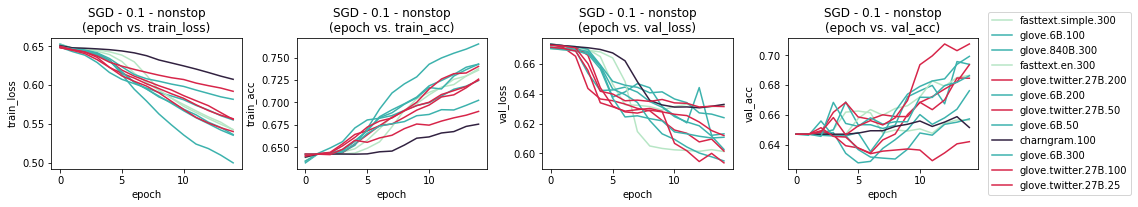

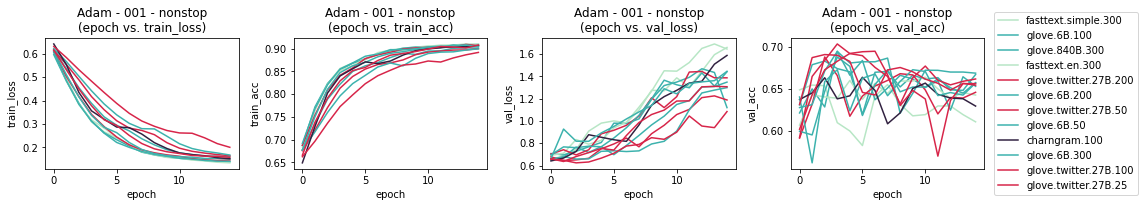

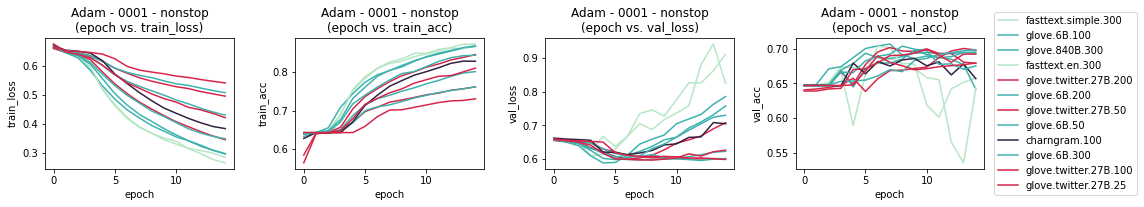

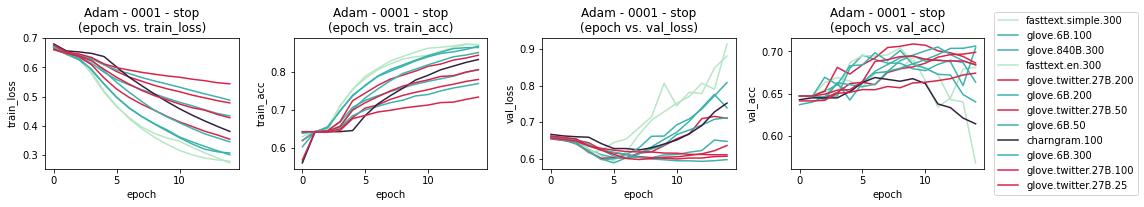

In [6]:
# !mv "experimentation/full/full_experiment_adam_.001" "experimentation/full/full_experiment_adam_1"
names = ["SGD - 0.1 - nonstop", "Adam - 001 - nonstop", "Adam - 0001 - nonstop", "Adam - 0001 - stop", ]

for index, path in enumerate(os.listdir("experimentation/full")):
    
    generate_multiline(f"experimentation/full/{path}",
                       "epoch",
                       ["train_loss", "train_acc", "val_loss", "val_acc"], 
                       "name",
                       names[index],
                       True
                      )

In [7]:
# Use with individual .csv results
# generate_scatterplot(path, "test_loss", "test_acc", "Test loss vs. test accuracy")
# generate_sparkline(path, "embedding", "test_acc", "Test accuracy by embedding")
# generate_sparkline(path, "embedding", "test_loss", "Test loss by embedding")